In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder
import os
import joblib

In [17]:
df = pd.read_csv('merged_dataset.csv')
df = df[df['year'] >= 2000]
df.shape
row, col = df.shape

In [28]:
print('max: ', df['year'].max())
print('min: ', df['year'].min())
print(len(df[(df['year'] >= 1983) & (df['year'] <= 2000)]))
for i in range(2000, 2022):
    print(f'Tổng số mẫu từ năm {i}',len(df[df['year'] == i]) * 100/row)


max:  2020
min:  2000
27
Tổng số mẫu từ năm 2000 0.1698647373387858
Tổng số mẫu từ năm 2001 0.09436929852154766
Tổng số mẫu từ năm 2002 0.26423403586033345
Tổng số mẫu từ năm 2003 0.42151620006291285
Tổng số mẫu từ năm 2004 0.6165460836741113
Tổng số mẫu từ năm 2005 0.9751494180559924
Tổng số mẫu từ năm 2006 1.2960050330292545
Tổng số mẫu từ năm 2007 1.9251336898395721
Tổng số mẫu từ năm 2008 2.592010066058509
Tổng số mẫu từ năm 2009 3.057565272098144
Tổng số mẫu từ năm 2010 5.0644856873230575
Tổng số mẫu từ năm 2011 7.694243472790186
Tổng số mẫu từ năm 2012 8.983957219251337
Tổng số mẫu từ năm 2013 9.694872601446995
Tổng số mẫu từ năm 2014 10.135262661214218
Tổng số mẫu từ năm 2015 10.776973891160742
Tổng số mẫu từ năm 2016 11.160742371815036
Tổng số mẫu từ năm 2017 11.368354828562442
Tổng số mẫu từ năm 2018 8.115759672853098
Tổng số mẫu từ năm 2019 4.963825102233407
Tổng số mẫu từ năm 2020 0.6291286568103177
Tổng số mẫu từ năm 2021 0.0


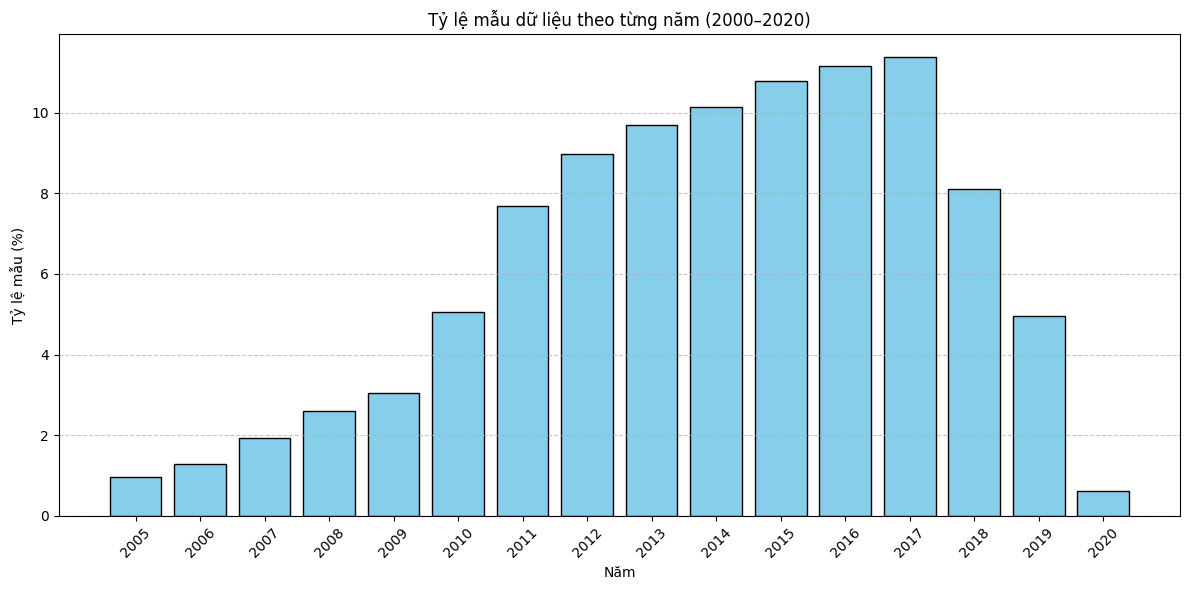

In [54]:
row = len(df)

# Tạo danh sách năm và phần trăm mẫu theo từng năm
years = list(range(2005, 2021))
percentages = [len(df[df['year'] == i]) * 100 / row for i in years]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(years, percentages, color='skyblue', edgecolor='black')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ mẫu (%)')
plt.title('Tỷ lệ mẫu dữ liệu theo từng năm (2000–2020)')
plt.xticks(years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


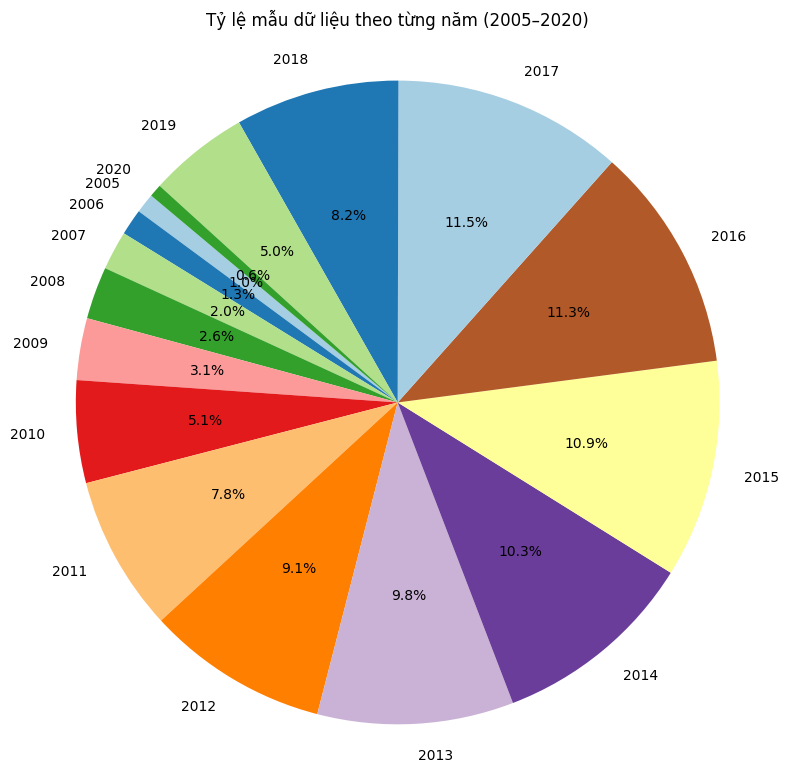

In [53]:

years = list(range(2005, 2021))
percentages = [len(df[df['year'] == i]) * 100 / row for i in years]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=years, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Tỷ lệ mẫu dữ liệu theo từng năm (2005–2020)')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.tight_layout()
plt.show()

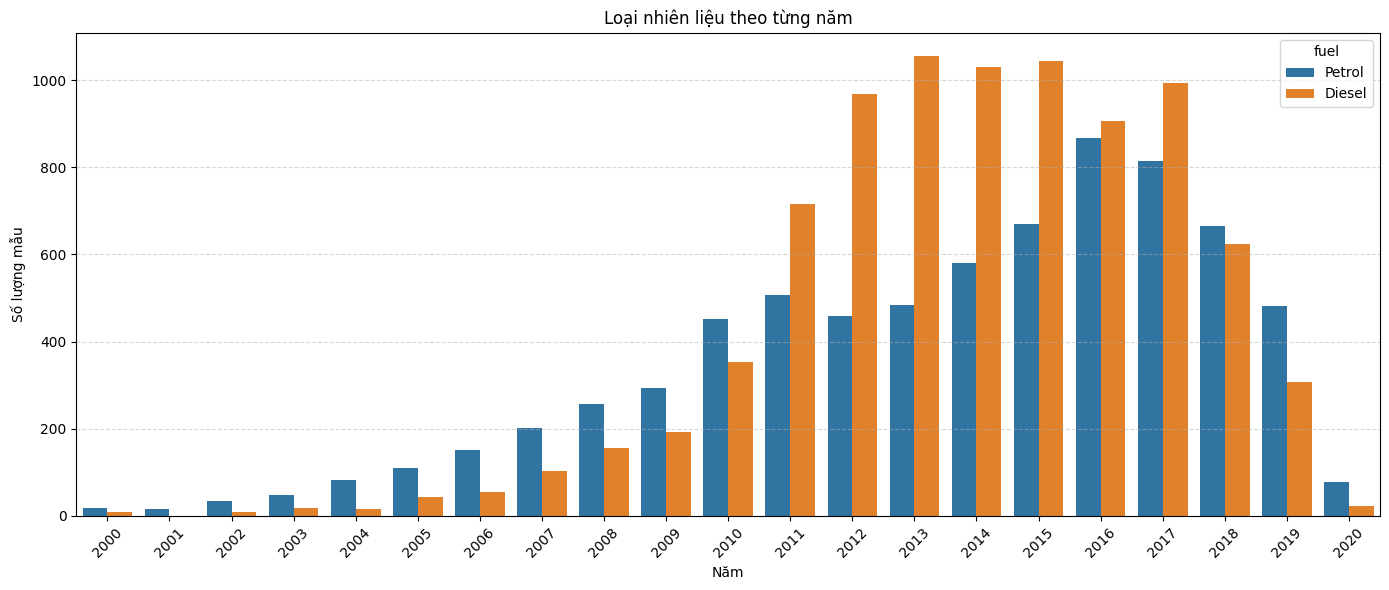

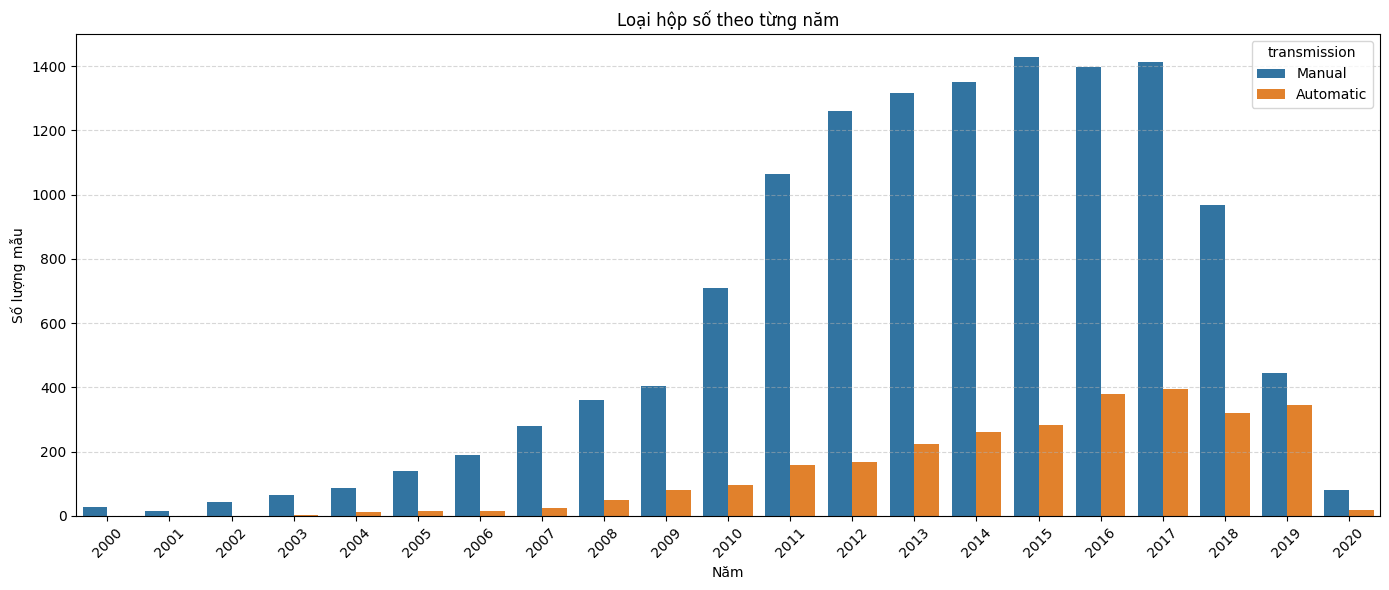

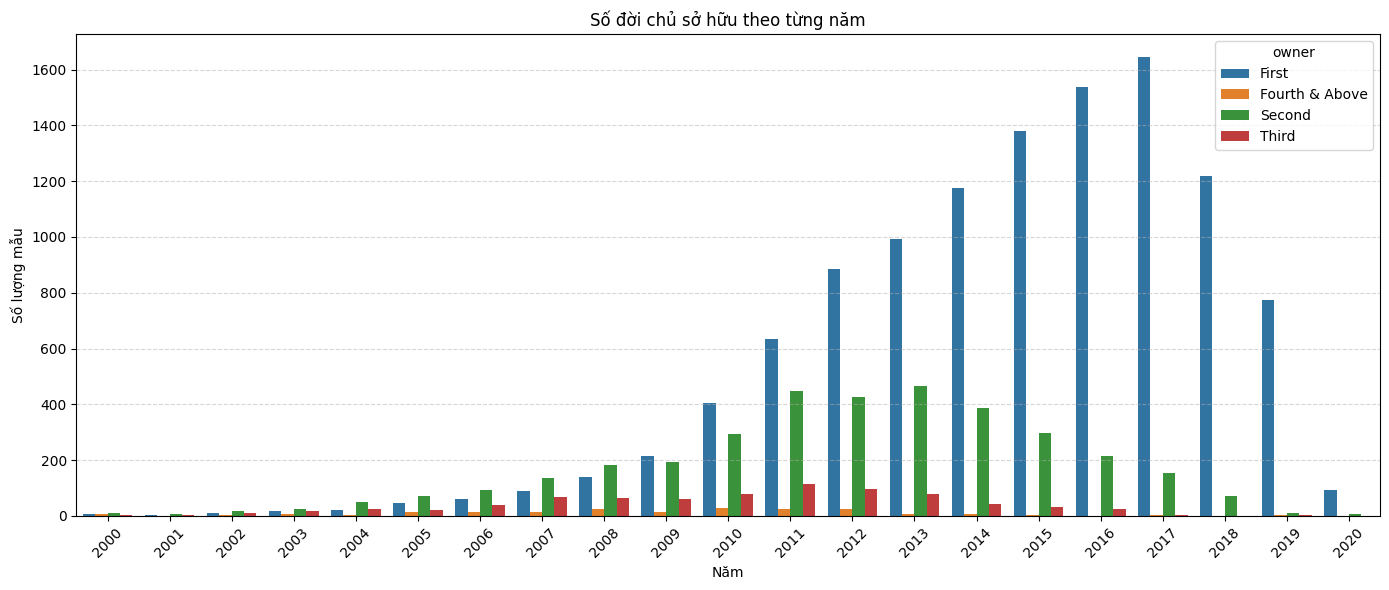

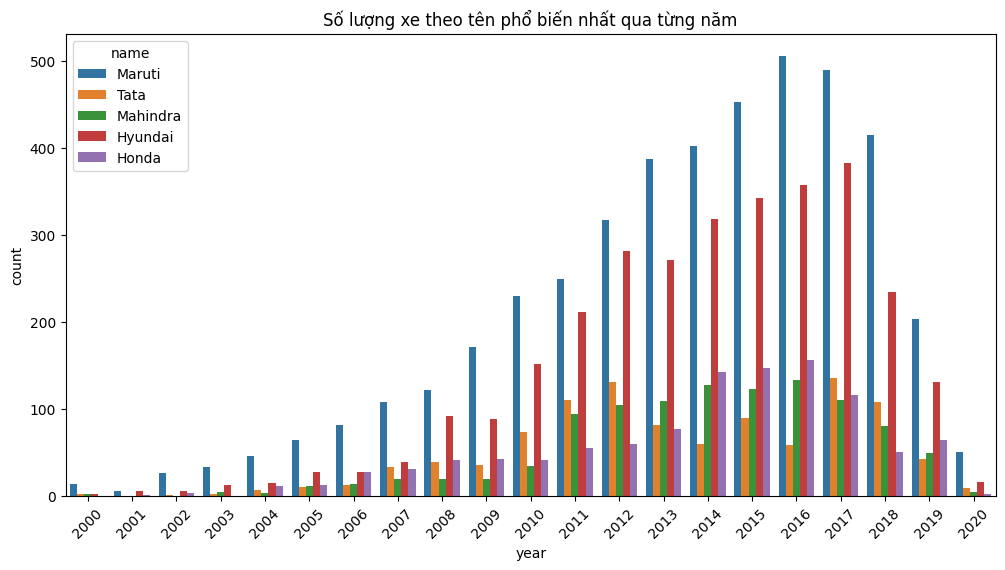

In [55]:
# Danh sách năm cần xét
years = list(range(2000, 2021))

# Hàm vẽ biểu đồ cột theo từng năm cho 1 cột phân loại
def plot_category_by_year(df, column_name, title):
    plt.figure(figsize=(14, 6))
    filtered_df = df[df['year'].isin(years)]
    sns.countplot(data=filtered_df, x='year', hue=column_name)
    plt.title(f'{title} theo từng năm')
    plt.xlabel('Năm')
    plt.ylabel('Số lượng mẫu')
    plt.xticks(rotation=45)
    plt.legend(title=column_name)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Áp dụng cho từng cột
plot_category_by_year(df, 'fuel', 'Loại nhiên liệu')
plot_category_by_year(df, 'transmission', 'Loại hộp số')
plot_category_by_year(df, 'owner', 'Số đời chủ sở hữu')


# Cột 'name' (số lượng xe theo năm)
top_names = df['name'].value_counts().nlargest(5).index
filtered = df[df['name'].isin(top_names)]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered, x='year', hue='name')
plt.title('Số lượng xe theo tên phổ biến nhất qua từng năm')
plt.xticks(rotation=45)
plt.show()


In [56]:

# Hàm vẽ stacked bar chart
def plot_stacked_bar_by_year(df, column_name, title):
    filtered_df = df[df['year'].isin(years)]
    
    # Tạo bảng đếm
    count_df = filtered_df.groupby(['year', column_name]).size().unstack(fill_value=0)
    
    # Vẽ stacked bar
    count_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
    plt.title(f'{title} theo từng năm')
    plt.xlabel('Năm')
    plt.ylabel('Số lượng mẫu')
    plt.xticks(rotation=45)
    plt.legend(title=column_name)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


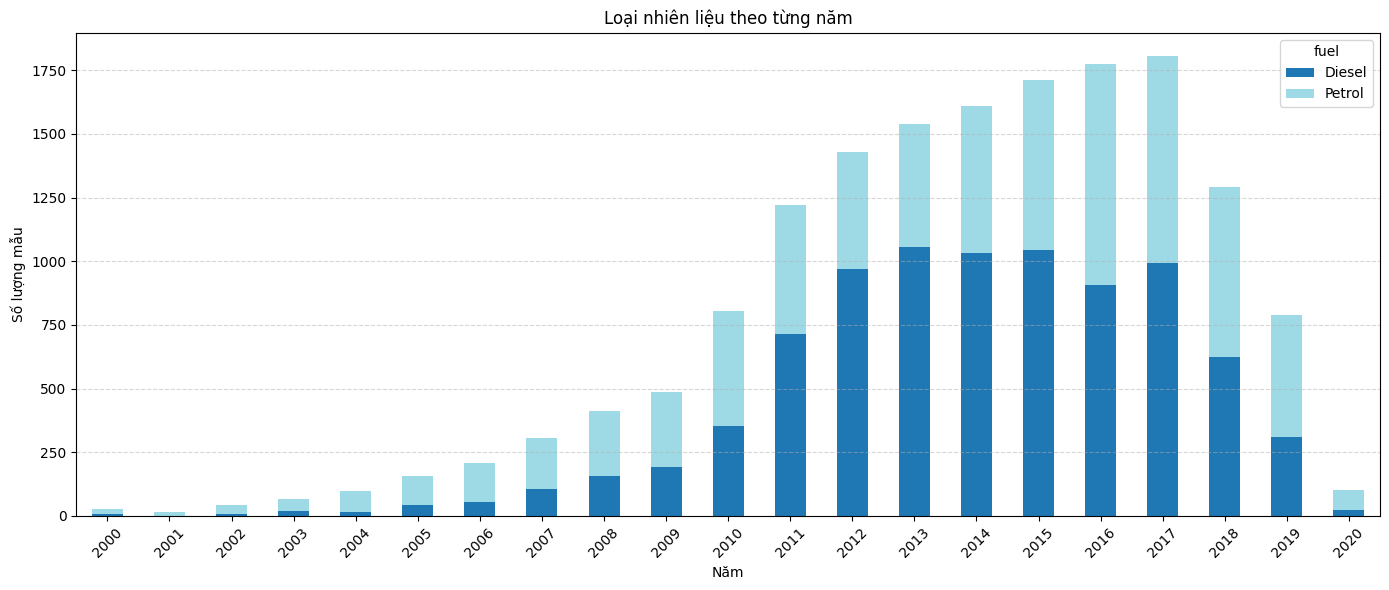

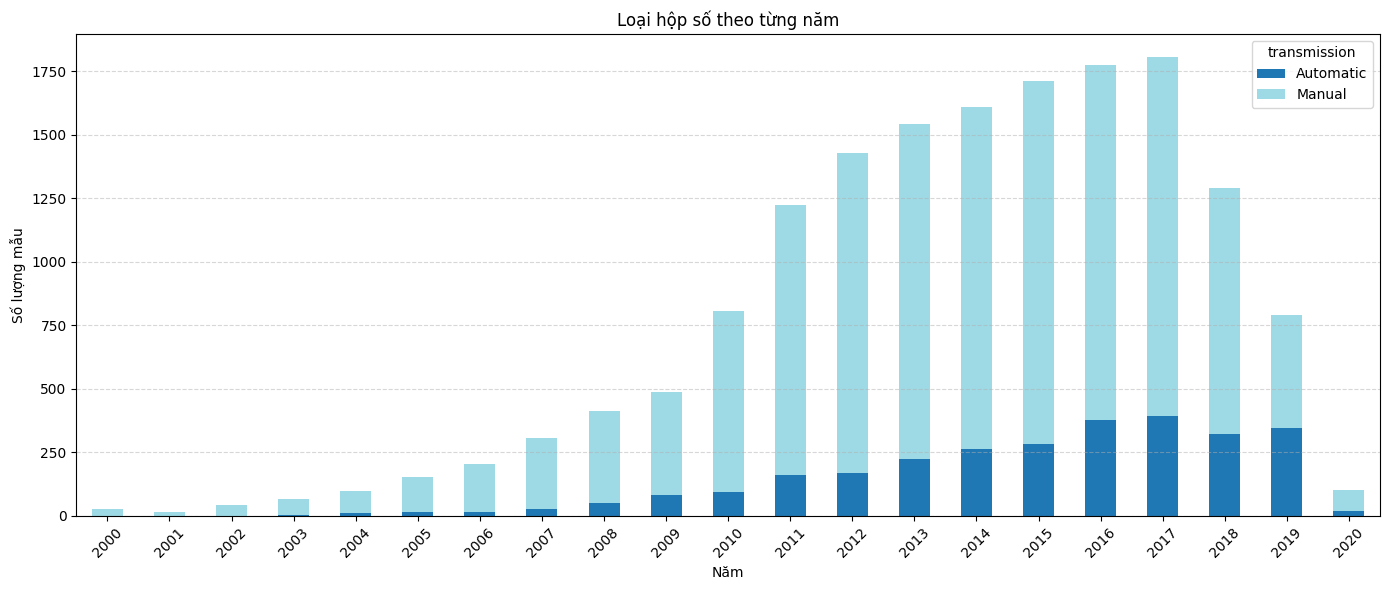

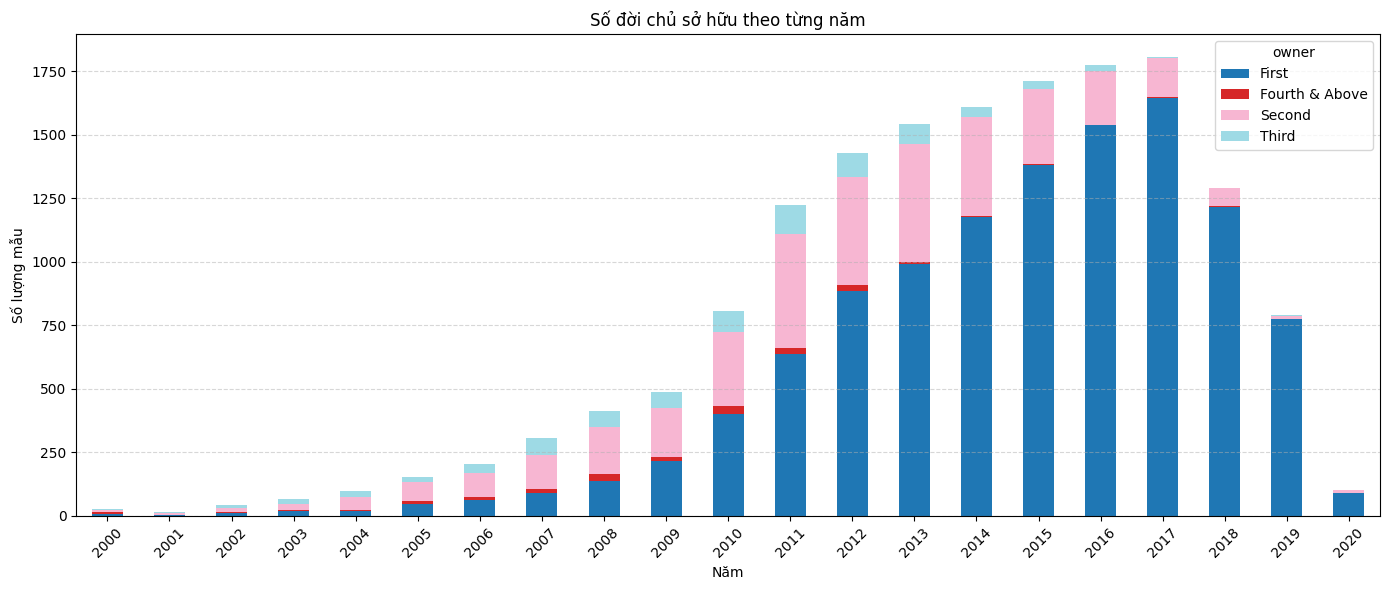

In [57]:
plot_stacked_bar_by_year(df, 'fuel', 'Loại nhiên liệu')
plot_stacked_bar_by_year(df, 'transmission', 'Loại hộp số')
plot_stacked_bar_by_year(df, 'owner', 'Số đời chủ sở hữu')

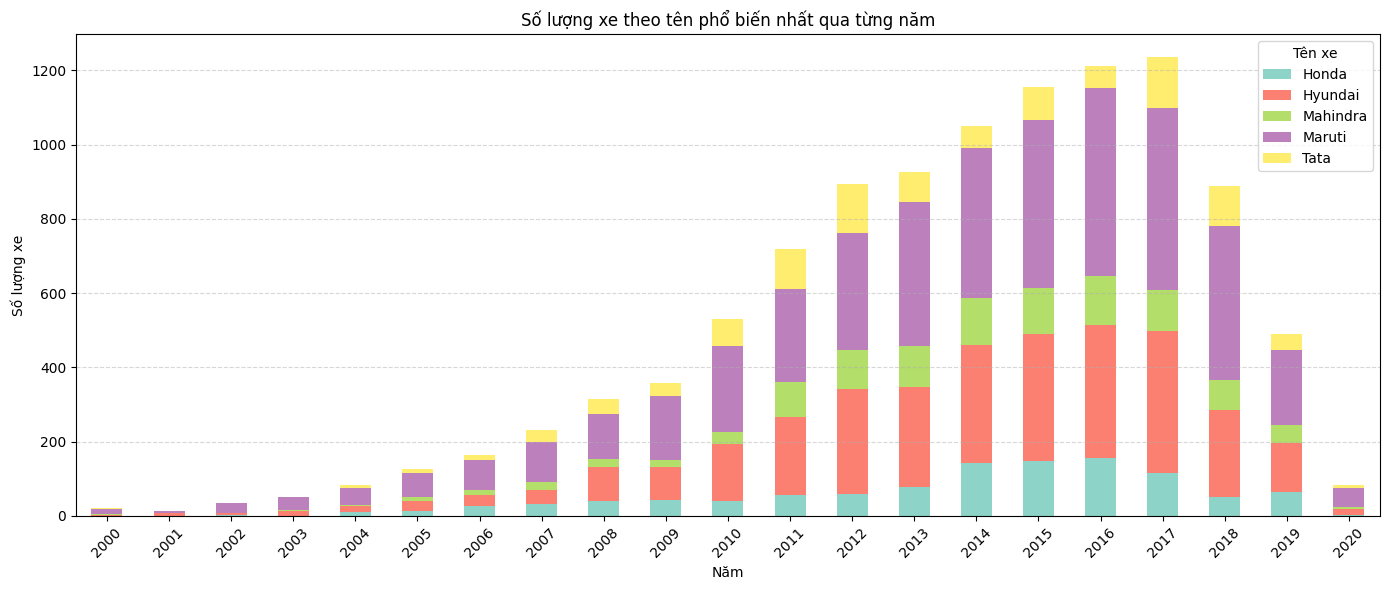

In [58]:
top_names = df['name'].value_counts().nlargest(5).index
filtered = df[df['name'].isin(top_names)]
count_df = filtered.groupby(['year', 'name']).size().unstack(fill_value=0)

count_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set3')
plt.title('Số lượng xe theo tên phổ biến nhất qua từng năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng xe')
plt.xticks(rotation=45)
plt.legend(title='Tên xe')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [59]:
def VeBieuDoCotTheoNam(dataframe):
    cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
    years = list(range(2000, 2021))

    for col in cols:
        mean_val = [dataframe[dataframe['year'] == y][col].mean() for y in years]
        max_val = [dataframe[dataframe['year'] == y][col].max() for y in years]
        min_val = [dataframe[dataframe['year'] == y][col].min() for y in years]
        mode_val = [
            dataframe[dataframe['year'] == y][col].mode().iloc[0] if not dataframe[dataframe['year'] == y][col].mode().empty else None
            for y in years
        ]
        
        # Vẽ 4 biểu đồ cột cho mỗi thống kê
        fig, axs = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle(f'{col.upper()} theo năm', fontsize=16)

        axs[0, 0].bar(years, mean_val, color='cornflowerblue', edgecolor='black')
        axs[0, 0].set_title('Mean')

        axs[0, 1].bar(years, max_val, color='lightgreen', edgecolor='black')
        axs[0, 1].set_title('Max')

        axs[1, 0].bar(years, min_val, color='salmon', edgecolor='black')
        axs[1, 0].set_title('Min')

        axs[1, 1].bar(years, mode_val, color='gold', edgecolor='black')
        axs[1, 1].set_title('Mode')

        for ax in axs.flat:
            ax.set_xlabel('Năm')
            ax.set_ylabel(col)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            ax.tick_params(axis='x', rotation=45)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


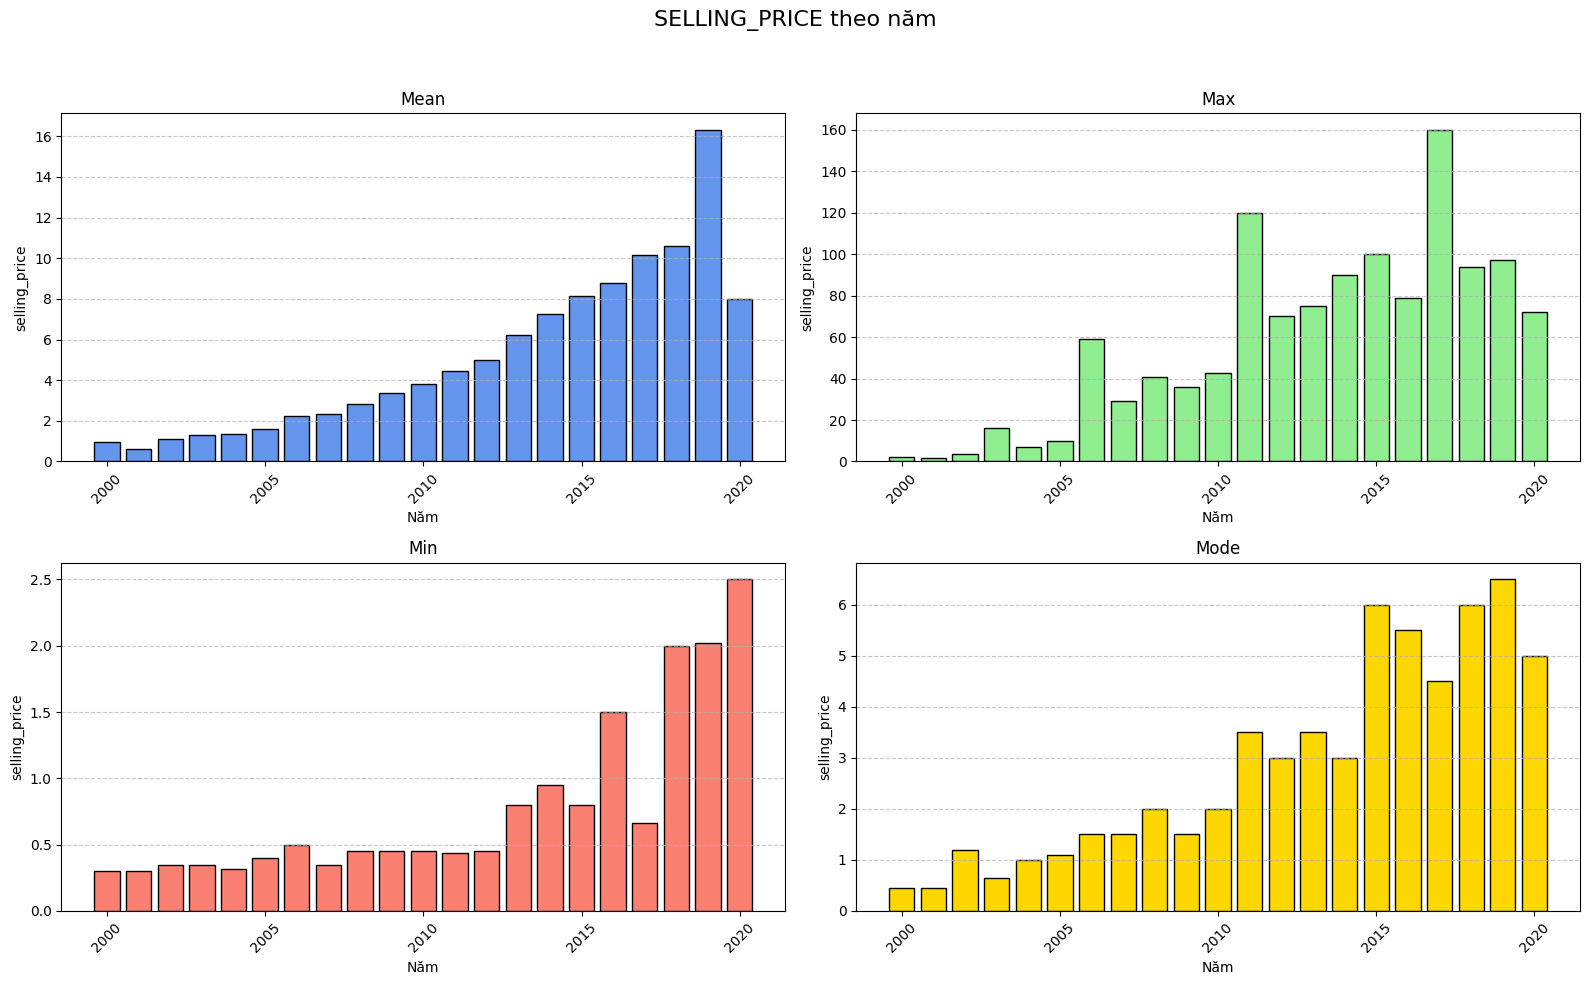

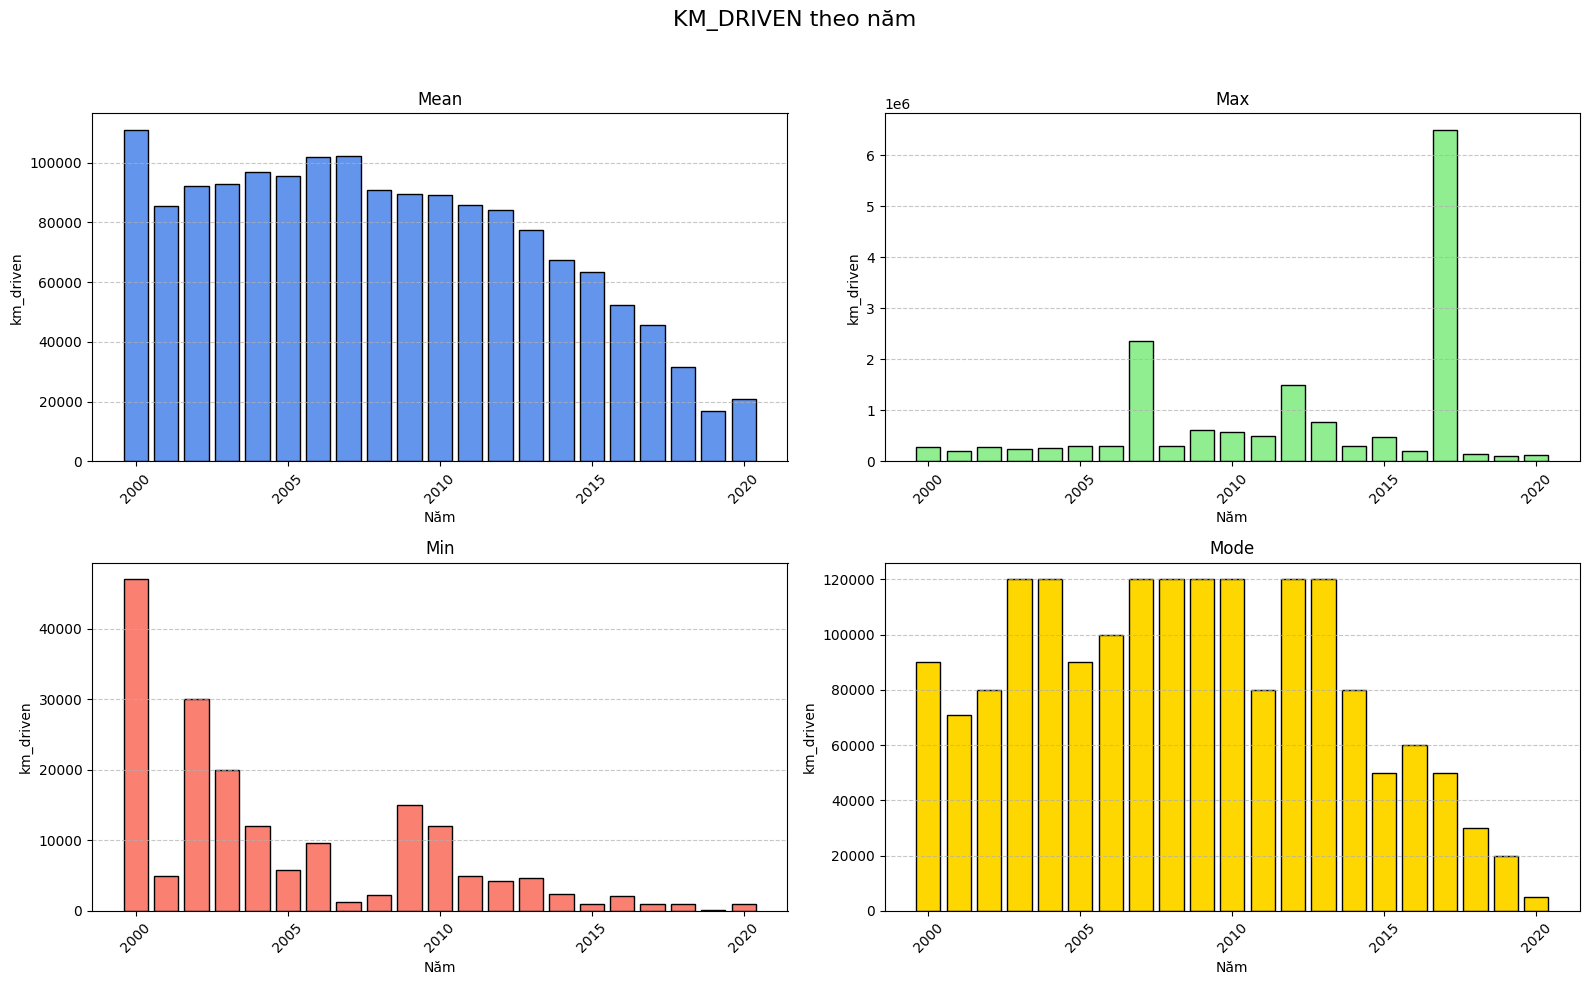

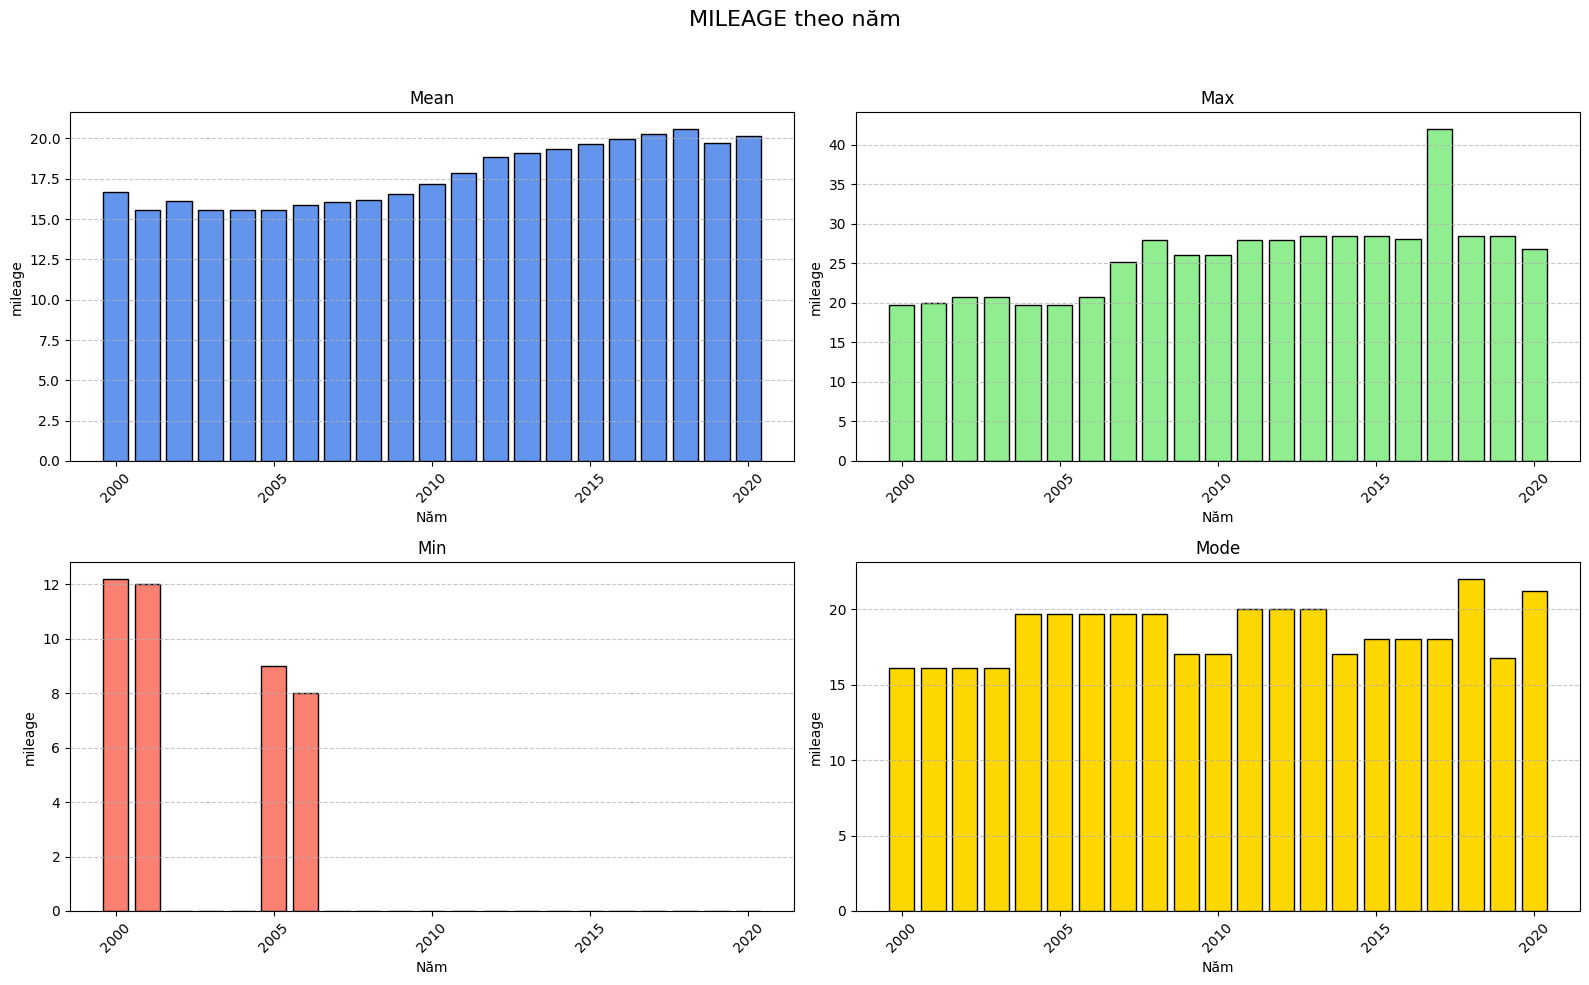

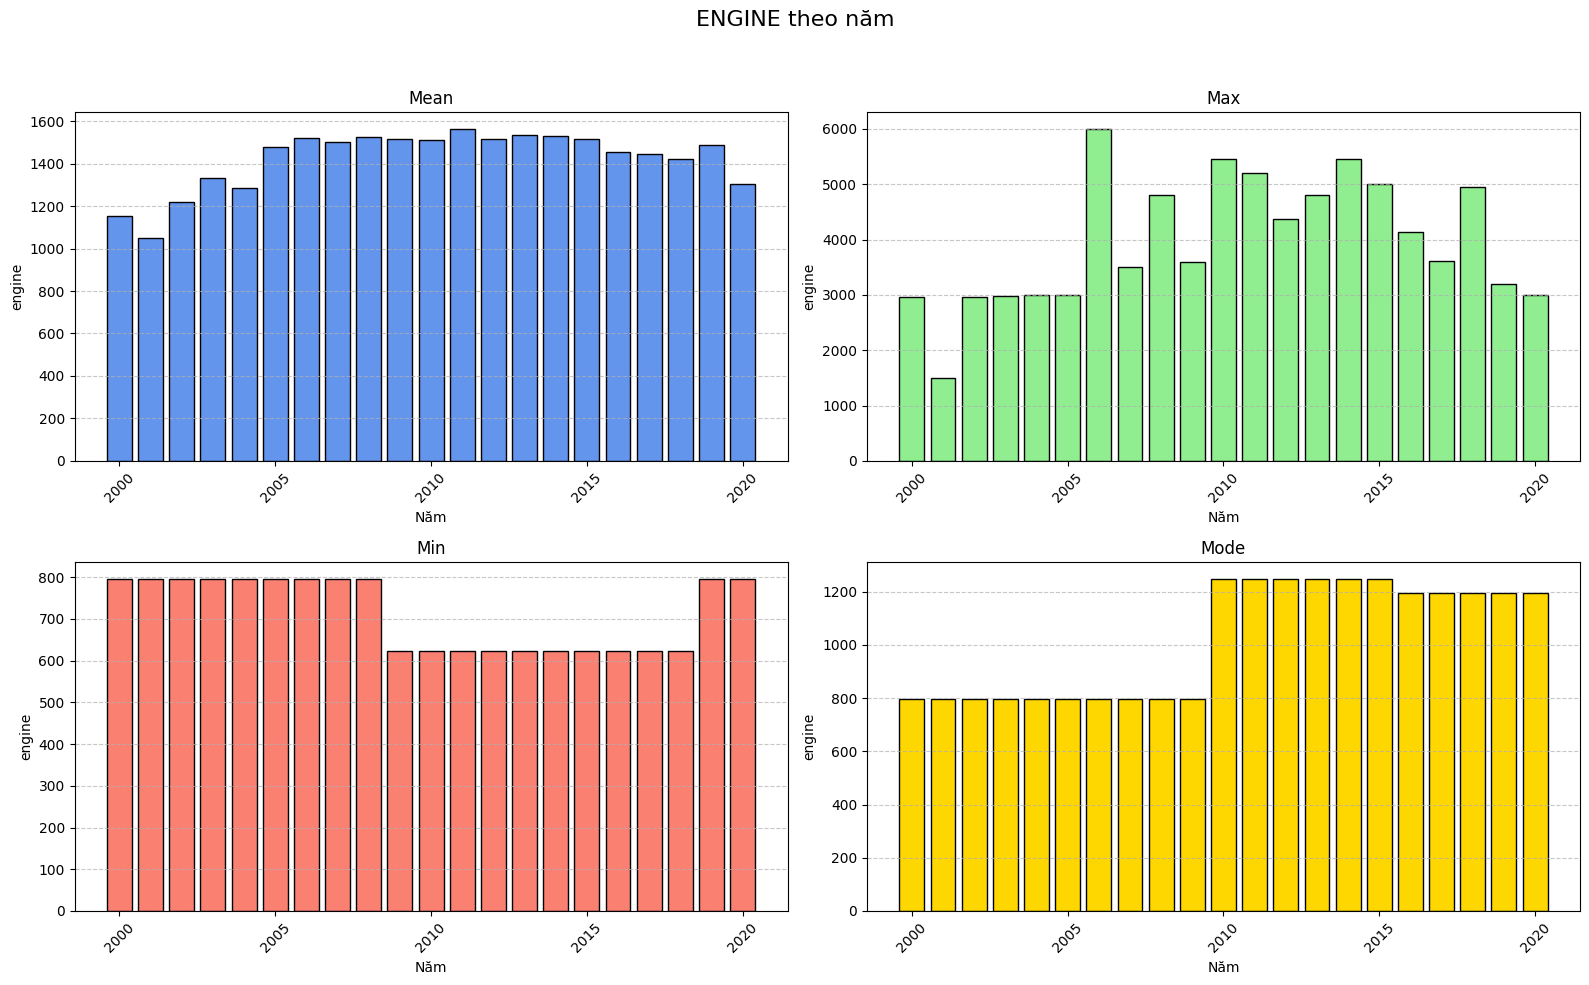

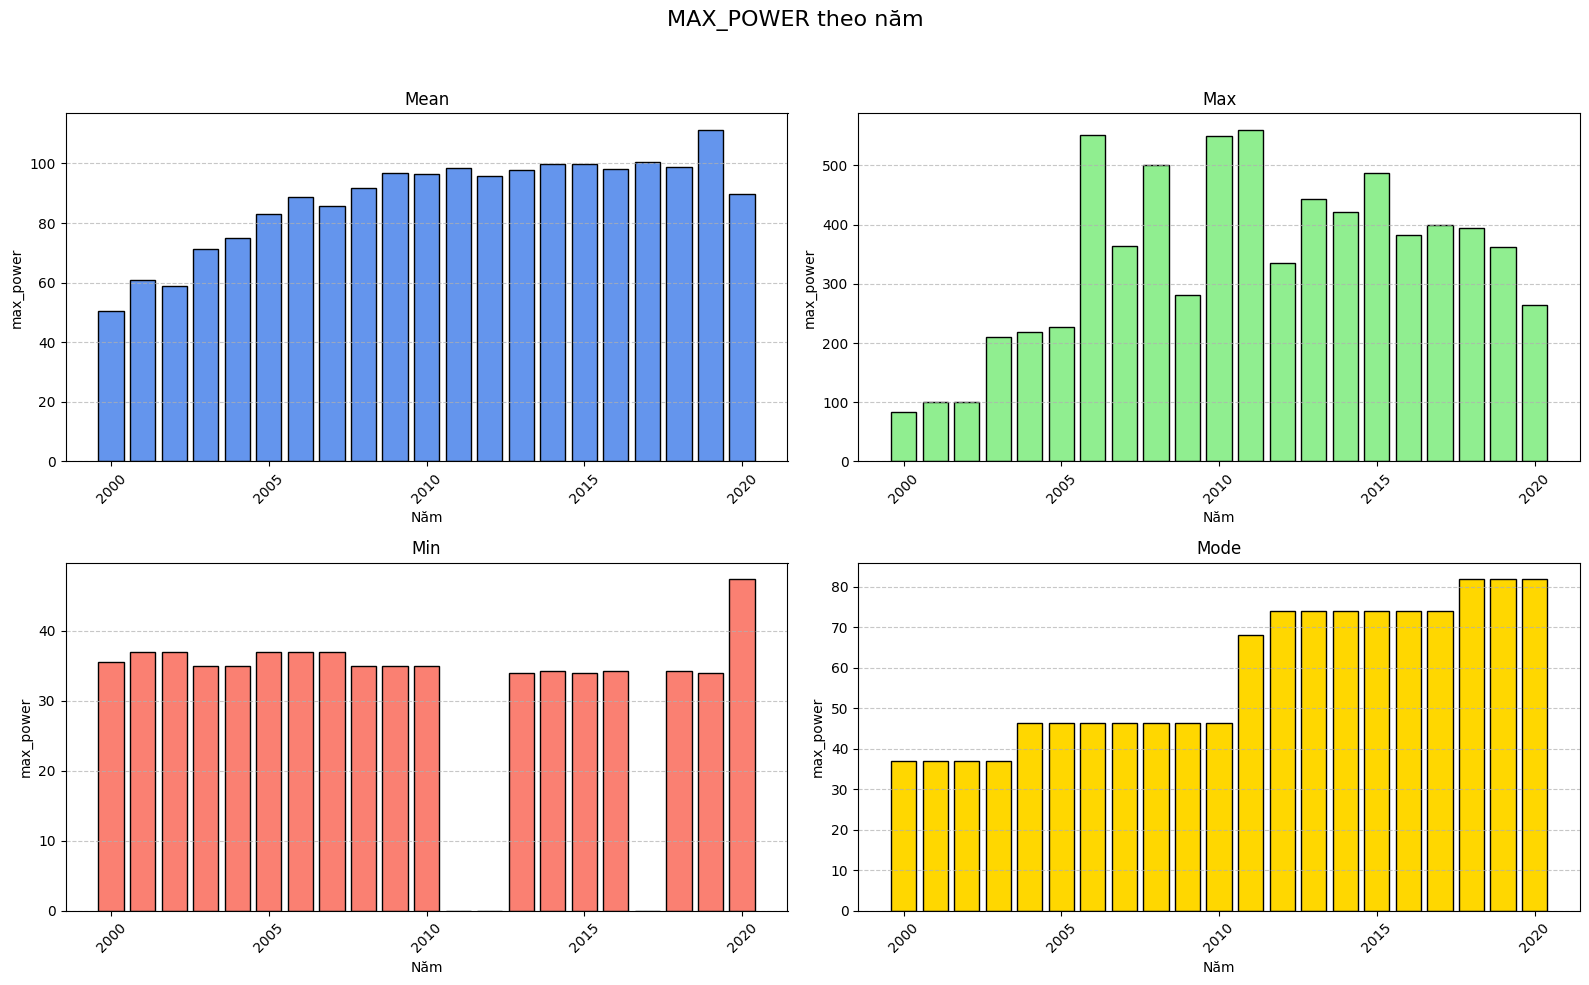

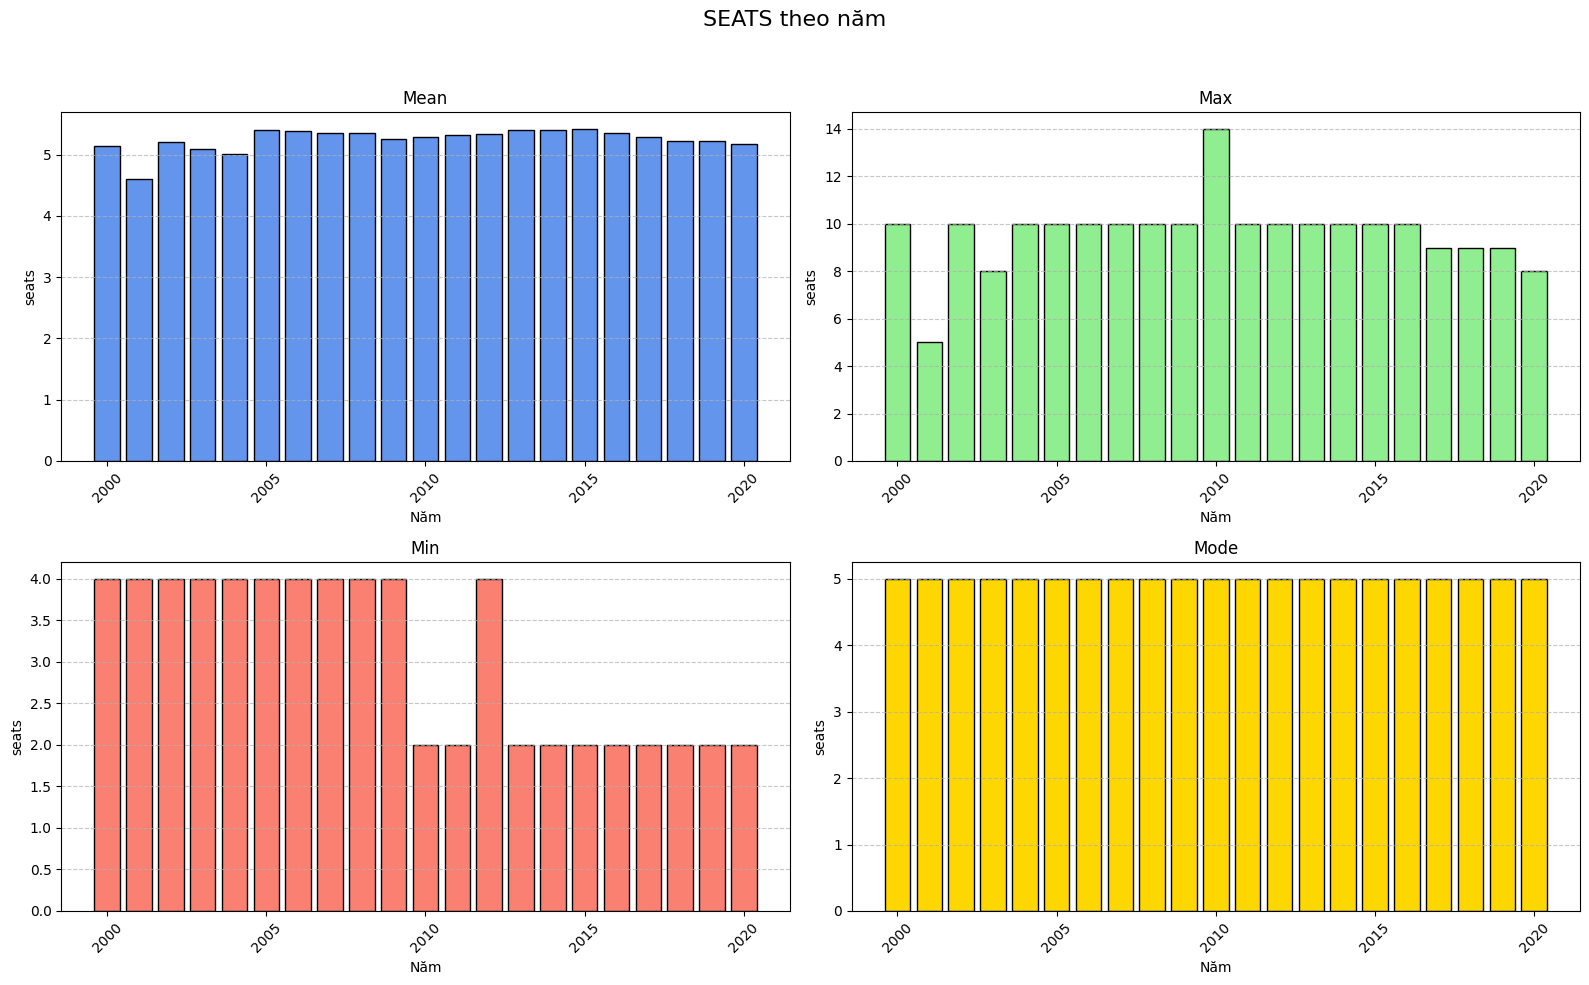

In [60]:
VeBieuDoCotTheoNam(df)

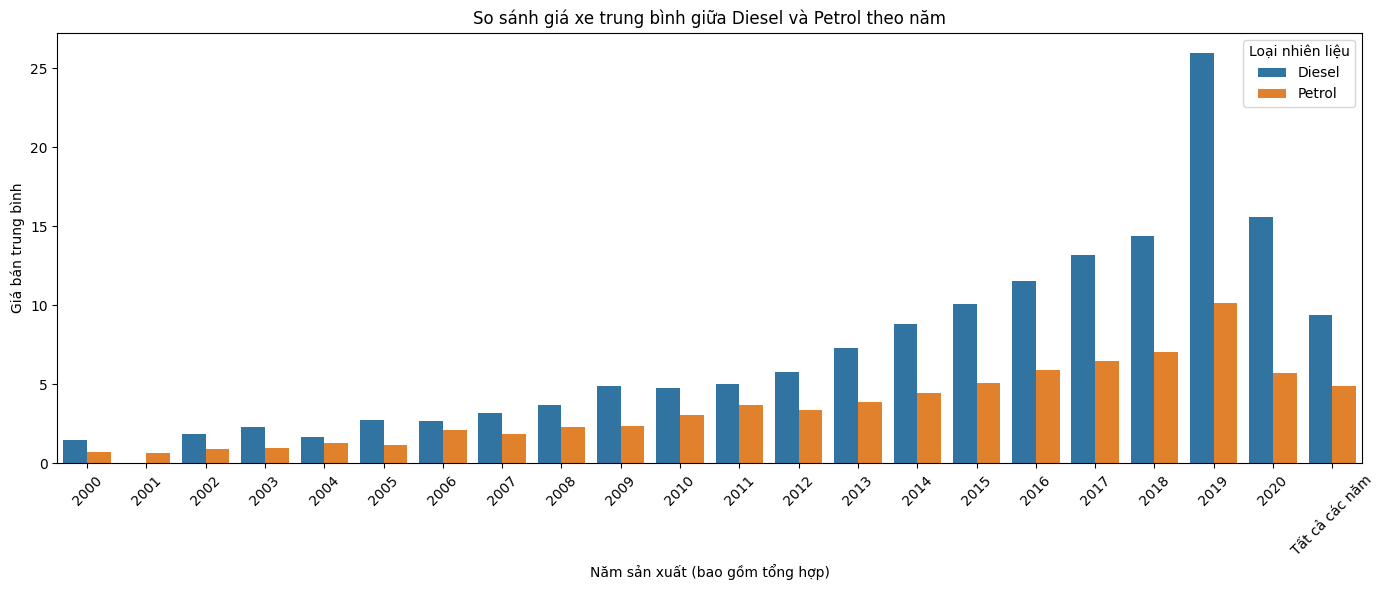

In [61]:
df_fuel = df[df['fuel'].isin(['Diesel', 'Petrol'])]
# Tính trung bình theo năm
avg_price_by_fuel_year = df_fuel.groupby(['year', 'fuel'])['selling_price'].mean().reset_index()

# Tính trung bình toàn bộ cho mỗi loại nhiên liệu (bỏ qua year)
avg_total = df_fuel.groupby('fuel')['selling_price'].mean().reset_index()
avg_total['year'] = 'Tất cả các năm'  # Đặt nhãn năm đặc biệt

# Nối lại với bảng chính
avg_price_all = pd.concat([avg_price_by_fuel_year, avg_total], ignore_index=True)
plt.figure(figsize=(14,6))
sns.barplot(data=avg_price_all, x='year', y='selling_price', hue='fuel')

plt.title('So sánh giá xe trung bình giữa Diesel và Petrol theo năm')
plt.xlabel('Năm sản xuất (bao gồm tổng hợp)')
plt.ylabel('Giá bán trung bình')
plt.xticks(rotation=45)
plt.legend(title='Loại nhiên liệu')
plt.tight_layout()
plt.show()


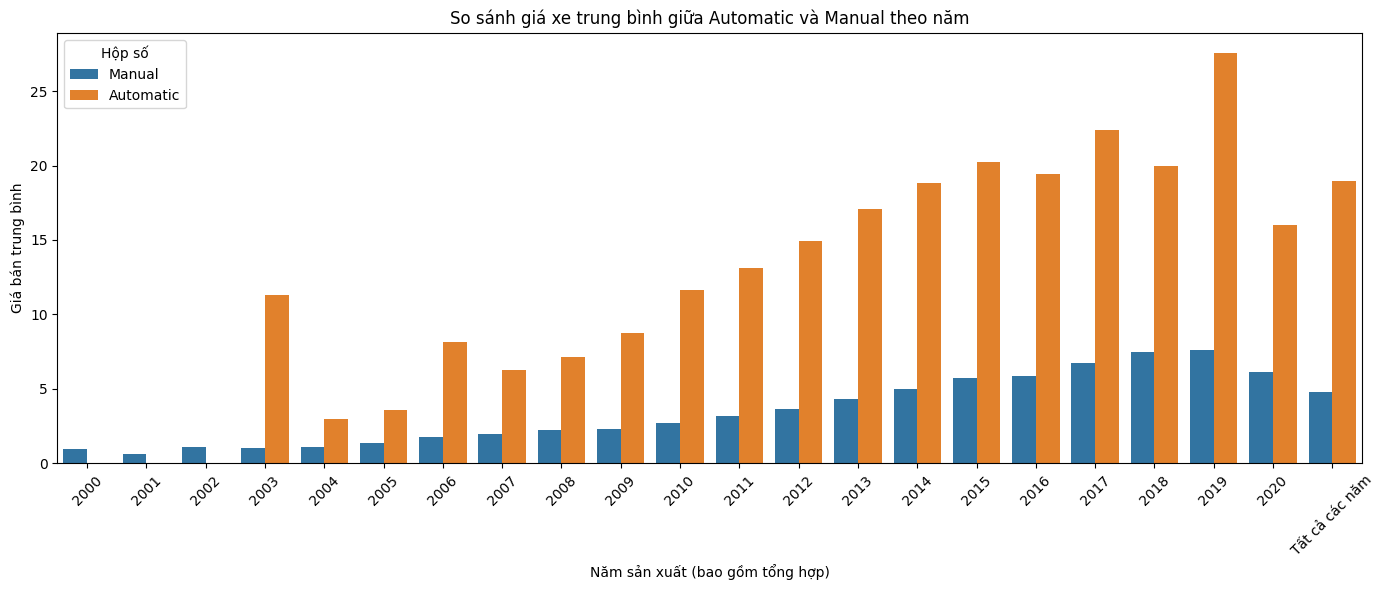

In [44]:
df_transmission = df[df['transmission'].isin(['Automatic', 'Manual'])]
# Tính giá trung bình theo năm và hộp số
avg_price_by_transmission_year = df_transmission.groupby(['year', 'transmission'])['selling_price'].mean().reset_index()

# Tính giá trung bình toàn bộ cho mỗi loại hộp số
avg_total_transmission = df_transmission.groupby('transmission')['selling_price'].mean().reset_index()
avg_total_transmission['year'] = 'Tất cả các năm'  # Đặt nhãn năm đặc biệt

# Nối lại với bảng chính
avg_price_transmission_all = pd.concat([avg_price_by_transmission_year, avg_total_transmission], ignore_index=True)

plt.figure(figsize=(14,6))
sns.barplot(data=avg_price_transmission_all, x='year', y='selling_price', hue='transmission')

plt.title('So sánh giá xe trung bình giữa Automatic và Manual theo năm')
plt.xlabel('Năm sản xuất (bao gồm tổng hợp)')
plt.ylabel('Giá bán trung bình')
plt.xticks(rotation=45)
plt.legend(title='Hộp số')
plt.tight_layout()
plt.show()


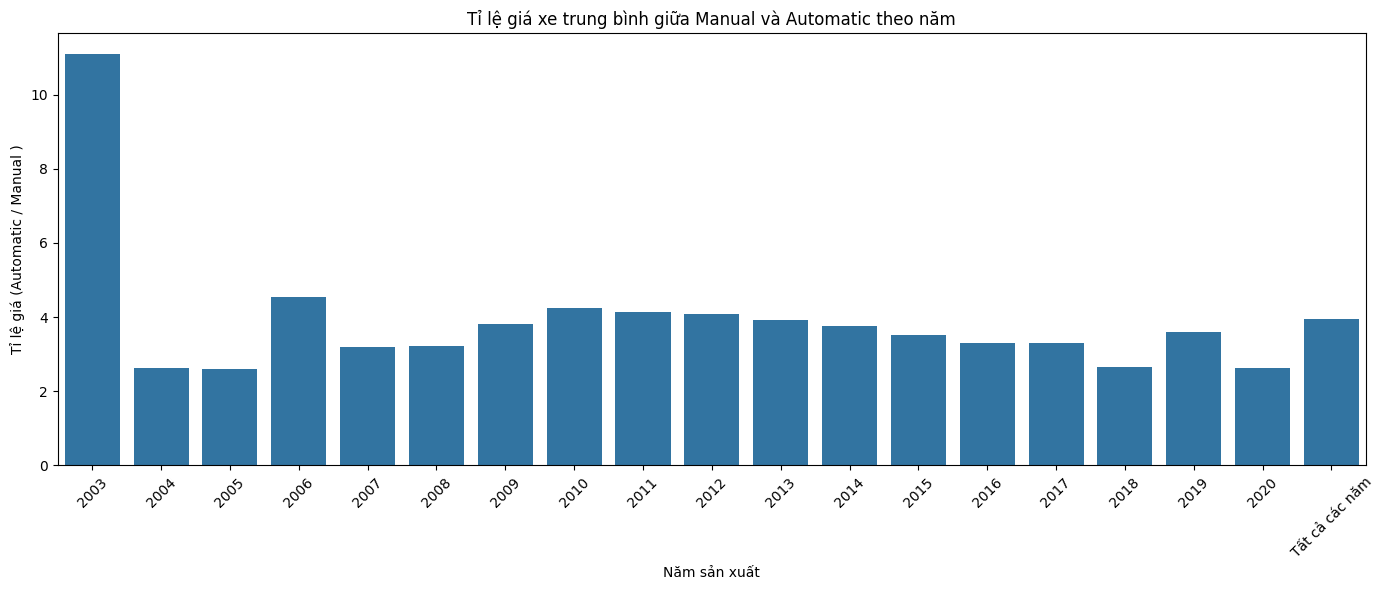

In [45]:
df_transmission = df[df['transmission'].isin(['Automatic', 'Manual'])]
# Tính giá trung bình theo năm và loại hộp số
avg_price_by_transmission_year = df_transmission.groupby(['year', 'transmission'])['selling_price'].mean().reset_index()

# Tính giá trung bình toàn bộ cho từng loại hộp số
avg_total_transmission = df_transmission.groupby('transmission')['selling_price'].mean().reset_index()
avg_total_transmission['year'] = 'Tất cả các năm'  # Đặt nhãn năm đặc biệt

# Nối lại với bảng chính
avg_price_transmission_all = pd.concat([avg_price_by_transmission_year, avg_total_transmission], ignore_index=True)
# Lấy giá trị trung bình của Manual và Automatic
manual_prices = avg_price_transmission_all[avg_price_transmission_all['transmission'] == 'Manual']
automatic_prices = avg_price_transmission_all[avg_price_transmission_all['transmission'] == 'Automatic']

# Merge 2 bảng Manual và Automatic theo 'year'
merged_prices = pd.merge(manual_prices, automatic_prices, on='year', suffixes=('_manual', '_automatic'))

# Tính tỉ lệ giá giữa Manual và Automatic
merged_prices['price_ratio'] = merged_prices['selling_price_automatic'] / merged_prices['selling_price_manual']
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.barplot(data=merged_prices, x='year', y='price_ratio')

plt.title('Tỉ lệ giá xe trung bình giữa Manual và Automatic theo năm')
plt.xlabel('Năm sản xuất')
plt.ylabel('Tỉ lệ giá (Automatic / Manual )')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


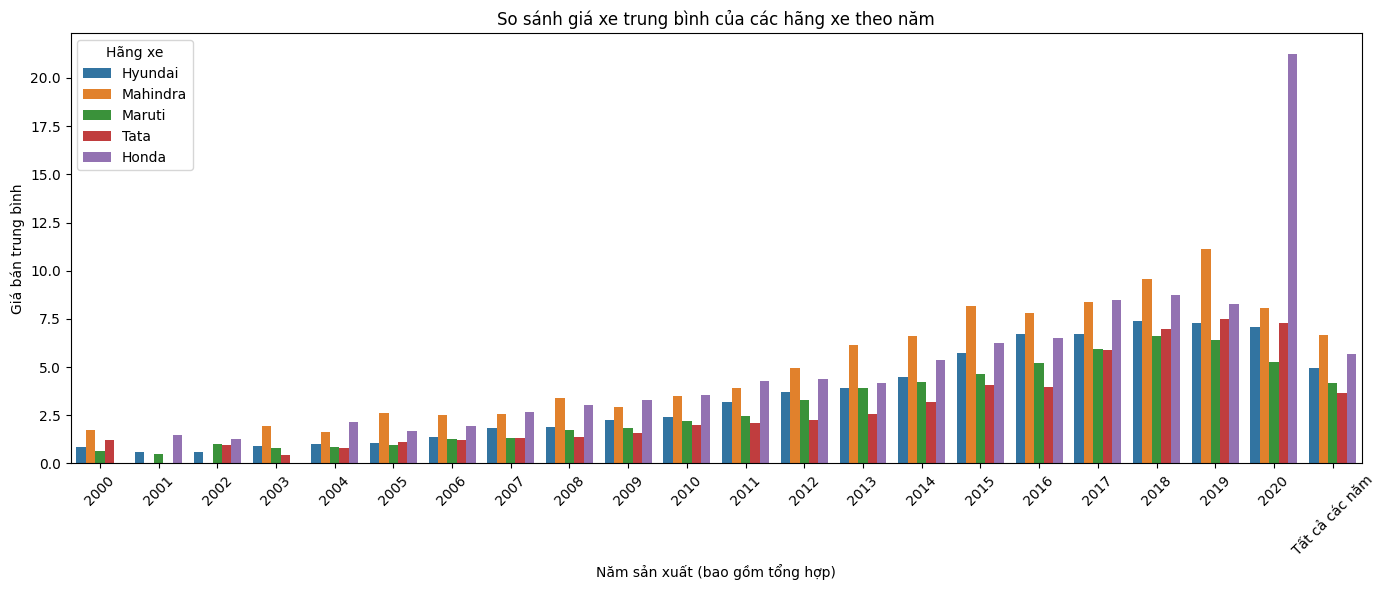

In [50]:
# Lọc dữ liệu theo các hãng xe
df_brand = df[df['name'].isin(['Maruti', 'Hyundai', 'Tata', 'Mahindra', 'Honda'])]

# Tính giá trung bình theo năm và hãng xe
avg_price_by_brand_year = df_brand.groupby(['year', 'name'])['selling_price'].mean().reset_index()

# Tính giá trung bình toàn bộ cho từng hãng xe
avg_total_brand = df_brand.groupby('name')['selling_price'].mean().reset_index()
avg_total_brand['year'] = 'Tất cả các năm'  # Đặt nhãn năm đặc biệt

# Nối lại với bảng chính
avg_price_brand_all = pd.concat([avg_price_by_brand_year, avg_total_brand], ignore_index=True)

# Vẽ biểu đồ cột so sánh giá xe trung bình của các hãng xe
plt.figure(figsize=(14,6))
sns.barplot(data=avg_price_brand_all, x='year', y='selling_price', hue='name')

plt.title('So sánh giá xe trung bình của các hãng xe theo năm')
plt.xlabel('Năm sản xuất (bao gồm tổng hợp)')
plt.ylabel('Giá bán trung bình')
plt.xticks(rotation=45)
plt.legend(title='Hãng xe')
plt.tight_layout()
plt.show()

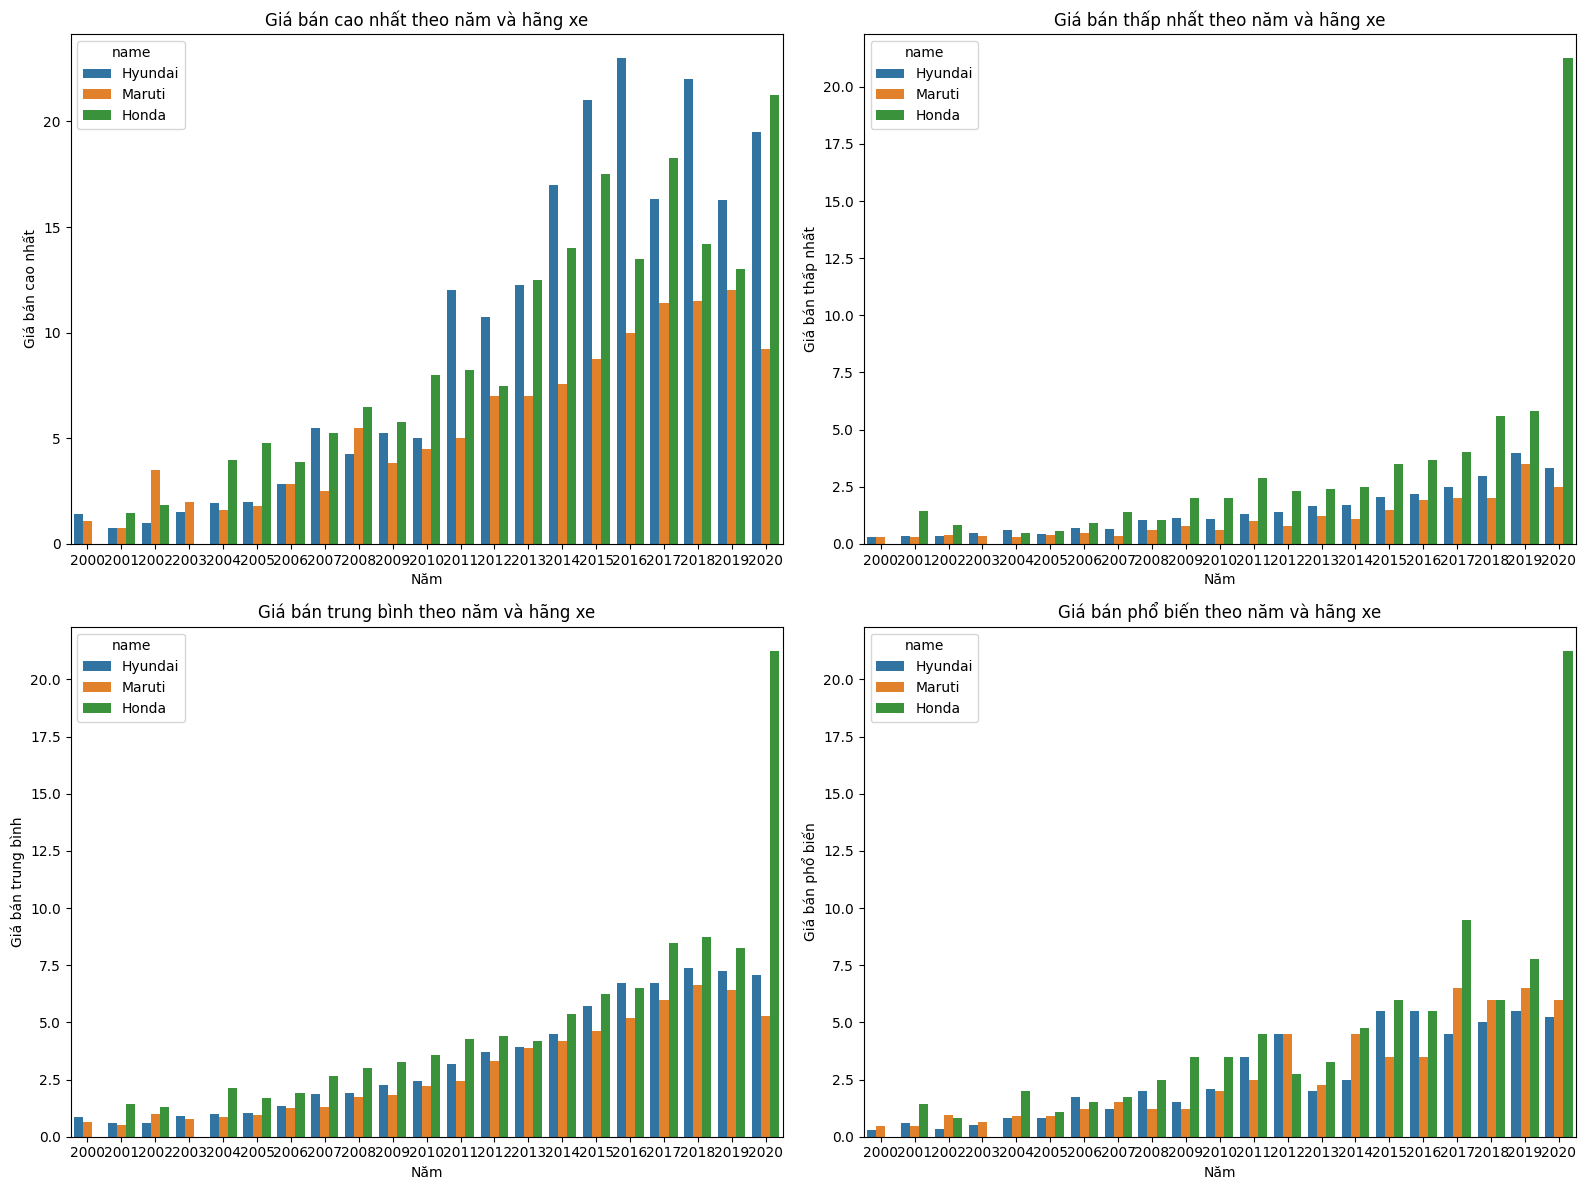

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lọc dữ liệu chỉ lấy các hãng xe Maruti, Hyundai, Tata, Mahindra, Honda
df_filtered = df[df['name'].isin(['Maruti', 'Hyundai', 'Honda'])]

# Giả sử 'name' là tên hãng xe và 'selling_price' là giá bán
df_grouped = df_filtered.groupby(['year', 'name'])['selling_price'].agg(
    ['max', 'min', 'mean', lambda x: x.mode()[0]]
).reset_index()

# Đổi tên cột 'lambda' thành 'mode'
df_grouped = df_grouped.rename(columns={'<lambda_0>': 'mode'})

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# Max price
sns.barplot(data=df_grouped, x='year', y='max', hue='name', ax=axes[0, 0])
axes[0, 0].set_title('Giá bán cao nhất theo năm và hãng xe')
axes[0, 0].set_xlabel('Năm')
axes[0, 0].set_ylabel('Giá bán cao nhất')

# Min price
sns.barplot(data=df_grouped, x='year', y='min', hue='name', ax=axes[0, 1])
axes[0, 1].set_title('Giá bán thấp nhất theo năm và hãng xe')
axes[0, 1].set_xlabel('Năm')
axes[0, 1].set_ylabel('Giá bán thấp nhất')

# Mean price
sns.barplot(data=df_grouped, x='year', y='mean', hue='name', ax=axes[1, 0])
axes[1, 0].set_title('Giá bán trung bình theo năm và hãng xe')
axes[1, 0].set_xlabel('Năm')
axes[1, 0].set_ylabel('Giá bán trung bình')

# Mode price
sns.barplot(data=df_grouped, x='year', y='mode', hue='name', ax=axes[1, 1])
axes[1, 1].set_title('Giá bán phổ biến theo năm và hãng xe')
axes[1, 1].set_xlabel('Năm')
axes[1, 1].set_ylabel('Giá bán phổ biến')

# Điều chỉnh layout
plt.tight_layout()
plt.show()
